In [ ]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import scipy
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
AutoMinorLocator)
from scipy.stats import linregress
import pandas as pd

In [ ]:
def IV_Perm_Triionic(I,V,T,Z1,Z2,Z3,C_cis1,C_trans1,C_cis2,C_trans2,C_cis3,C_trans3,ion_name1,ion_name2,ion_name3,p1,p2):

  R = 8.314
  F = 96485.3
# Gas Constant
# Faraday Constant
  I = I * 10**(-12) # picoAmp to Amp
  V = V * 10**(-3) # mV to V 
  T = T + 273.15 # deg c to k
  C_cis1 = C_cis1*10**(-3) # mM to M
  C_trans1 = C_trans1*10**(-3) # mM to M
  C_cis2 = C_cis2*10**(-3) # mM to M
  C_trans2 = C_trans2*10**(-3) # mM to M
  C_cis3 = C_cis3*10**(-3) # mM to M
  C_trans3 = C_trans3*10**(-3) # mM to M


# GHK Equation used to calulate the permiability ratio of the third ion.
  p3 = -((p1 * Z1**2)*(((C_cis1) - (C_trans1*(math.exp(-(Z1*F*V)/(R*T))))))/((1-(math.exp(-(Z1*F*V)/(R*T)))))) - ((p2 * Z2**2)*(((C_cis2) - (C_trans2*(math.exp(-(Z2*F*V)/(R*T))))))/((1-(math.exp(-(Z2*F*V)/(R*T))))))*(((1-(math.exp(-(Z3*F*V)/(R*T))))))/((Z3)**2 *((C_cis3) -(C_trans3*(math.exp(-(Z3*F*V)/(R*T))))))

  print("p3_Inhibitor = ",p3)
  return p3

In [ ]:
def IV_Perm_Biionic(I,V,T,Z1,Z2,C_cis1,C_trans1,C_cis2,C_trans2,ion_name1,ion_name2):

  R = 8.314
  F = 96485.3
# Gas Constant
# Faraday Constant
  I = I * 10**(-12) # picoAmp to Amp
  V = V * 10**(-3) # mV to V
  T = T + 273.15 # deg c to k
  C_cis1 = C_cis1*10**(-3) # mM to M
  C_trans1 = C_trans1*10**(-3) # mM to M
  C_cis2 = C_cis2*10**(-3) # mM to M
  C_trans2 = C_trans2*10**(-3) # mM to M
# GHK Equation- after Manupulation.
  p = - ((Z2**2)*((C_cis2) - (C_trans2*(math.exp(-(Z2*F*V)/(R*T)))))*(1-(math.exp(-(Z1*F*V)/(R*T))))) / ((Z1**2)*((C_cis1) - (C_trans1*(math.exp(-(Z1*F*V)/(R*T)))))*(1-(math.exp(-(Z2*F*V)/(R*T)))))
# Round figure for accuracy by 2 decimal points. # p = P1 / P2 = P_Na+ /P_Inhibitor-

  print("P_%s/P_%s = %s" % (ion_name2,ion_name1,p))
  return p

In [ ]:
import matplotlib.pyplot as plt


def Initial_IV_Graph(I_c,I_i,V,I_SE_control,I_SE_salt,name):
# Create plots with pre-defined labels.
  #fig, ax = plt.subplots()
  fig, ax = plt.subplots()

# Making Plots
  ax.plot(V, I_c, 'ks', label= "Control")
  ax.plot(V, I_i, 'ro', label= "TazoBactum 80/30" )
#ax.plot(V, I_i, 'ro', label= name )
# Setting Splines axis.
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['top'].set_color('none')
# Labels on the Axis and Titles.
  ax.set_xlabel('voltage (mV)')
  ax.xaxis.set_label_coords(.9, -.1)
  ax.set_ylabel('current (pA)')
  ax.yaxis.set_label_coords(-.1, .1)
#ax.set_title("A",loc = 'left') # Title
  ax.legend(loc='lower right',fontsize = 'small');
# Range limit on both axis x,y
  ax.set_xlim([-60, 60])
  ax.set_ylim([-300, 200])
# Error in the data. which is added to the error from standard deviation.
#Standard error
  slope, intercept, r_value, p_value, std_err = linregress(V, I_i)
# Error Bar Insertion
  y_errorIc = []
  y_errorIi = []

  for i in range(0,np.size(I_c)):
    y_errorIc = np.append(y_errorIc, I_i[i]*0.15) # Under 15 percent error␣
#I_i[i]*

  for i in range(0,np.size(I_i)):
    y_errorIi = np.append(y_errorIi,I_i[i]* 0.15) # Under 15 percent error

  ax.errorbar(V, I_c, yerr=y_errorIc, fmt='ks',capsize=2, linewidth=0.5);
  ax.errorbar(V, I_i, yerr=y_errorIi, fmt='ro',capsize=2, linewidth=0.5);
# Trend Line Code.
  ax.xaxis.set_minor_locator(MultipleLocator(5))
  ax.yaxis.set_minor_locator(MultipleLocator(20))
  z1 = np.polyfit(V, I_c, 1)
  p1 = np.poly1d(z1)
  plt.plot(V,p1(V),"r",lw = 0.5)
  z2 = np.polyfit(V, I_i, 1)
  p2 = np.poly1d(z2)
  plt.plot(V,p2(V),"r",lw = 0.5)
# Example for Tazobactum
  plt.savefig("Tazobactum8030.jpg", dpi=300)

In [ ]:
def reverse_potential(V,I_i,name): #linear regression
# Finding X and Y Intercept. For reversal potential.
  slope, intercept, r_value, p_value, std_err = linregress(V, I_i)
  V_rev_pot = -intercept/slope # Reverse Potential (X-intercept) <V-rev>
  I_rev_pot = 0 # Current is 0
  return V_rev_pot,slope,intercept

In [ ]:
def num_of_ions(I_y_intercept,num_of_porins,name): #linear regression
  n = ((I_y_intercept/num_of_porins)* 10**(-12) * (6.022 * 10**(23)))/(964853)
#n = math.ceil(n)
  print("Number of Ions Passing of %s = %s " % (name,n))
  return n;

In [ ]:
def standard_data(I1,I2,I3,name):
  N = np.size(I1)
  I_mean = []
  I_SD = []
  I_Error = []
  for i in range(0,N):
    I_mean = np.append(I_mean,((I1[i]+I2[i]+I3[i])/3))
# Standard deviation:
  for i in range(0,N):
    I_SD = np.append(I_SD,(math.sqrt(((I1[i]-I_mean[i])**2+(I1[i]-I_mean[i])**2+(I1[i]-I_mean[i])**2) / 2)))
# Standard Error:
  for i in range(0,N):
    I_Error = np.append(I_Error,(I_SD[i]/(math.sqrt(3))))
  
  return I_mean,I_SD, I_Error

In [ ]:
def breaking_ions_current(mV,z,T,c_cis,c_trans,P,name): # mV is a array ****
  N = np.size(mV)
  I = [] # Current Array ***
  V = []
  R = 8.314
  F = 96485.3
#I = I * 10**(-12) # picoAmp to Amp
  for i in range(0,N):
    V = np.append(V, mV[i] * 10**(-3)) # mV to V

  T = T + 273.15 # deg c to k
  c_cis = c_cis * 10**(-3) # mM to M
  c_trans = c_trans * 10**(-3) # mM to M

  for i in range(0,N):
    I = np.append(I,( ((P * z**2) * ((V[i] * F**2)/(R * T)) * (((c_cis) -(c_trans * np.exp((-z * V[i] * F)/(R * T))))) / (1 - np.exp((-z * V[i] * F)/(R * T))))) )

  print("I_%s = %s" % (name,I))
  return I

Slope =  4.197575757575758
Y-intercept =  -46.45454545454547
X-intercept (Reversal Potential) =  13.35
P_Cl-/P_Na+ = -0.19681094066998364
p1_Na+ =  -6
p2_Cl- =  1
p3_Inhibitor =  1.328773168874537
Number of Ions Passing of Avibactum_30_30_50_Trionic = 68655017.91464606 
I_Na+ = [  24878.51925496   15397.59939157    5331.64816438   -5383.33044254
  -16798.1567933               nan  -41836.95216174  -55460.92117941
  -69784.73794094  -84757.58208218 -100315.45758723]
I_Cl- = [-5690.63531101 -4552.50824881 -3414.38118661 -2276.2541244
 -1138.1270622             nan  1138.1270622   2276.2541244
  3414.38118661  4552.50824881  5690.63531101]
I_ Inhibitor- = [-14654.51789576 -12721.34934282 -10917.74311974  -9257.87192466
  -7752.99054698             nan  -5232.46937527  -4216.82958125
  -3356.17960462  -2639.26465599  -2051.91203723]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


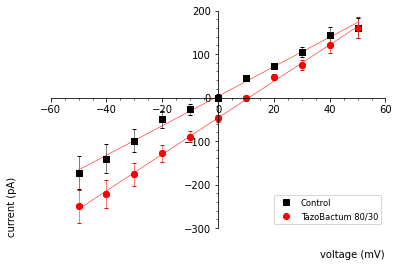

In [ ]:
# ONLY FOR TRI-IONIC EXPERIMENT

#**********Voltage Array
V = np.arange(-50, 60, 10) # mV



N = np.size(V)
# no closed right boundry
I_control = I_mean_control # pA
I_ihr_salt = I_mean_salt # pA
name = "Avibactum_30_30_50_Trionic" # Name of the Inhibitor Salt.
T = 22 # deg C (Temperature)
# Case of Tri-ionic. DATA ENTRY FOR CONCENTRATION OF THE IONS

ion_name1t = "Na+"
Z1t = 1 # Valence electron number
C_cis1t = 80 # mM
C_trans1t = 30 # mM
ion_name2t = "Cl-"
Z2t = -1
C_cis2t = 30 # mM
C_trans2t = 30 # mM
# Case of triionic it is Cl***
ion_name3t = " Inhibitor-"
Z3t = -1
C_cis3t = 50 # mM
C_trans3t = 0 # mM
I = 0
# Calculating reverse potential.
V_rev_pot,slope,intercept = reverse_potential(V,I_ihr_salt,name)
V_rev_pot = 13.35
print("Slope = ", slope)
print("Y-intercept = ", intercept)
print("X-intercept (Reversal Potential) = ", V_rev_pot)
# Plotting the graph. I-V curve.
Initial_IV_Graph(I_control,I_ihr_salt, V,I_SD_control,I_SD_salt,name)
# p is ratio of p_Cl- / p_Na+
p = IV_Perm_Biionic(I,V_rev_pot,T,Z1t,Z2t,C_cis1t,C_trans1t,C_cis2t,C_trans2t,ion_name1t,ion_name2t)
# Extracting data for p1 and p2 respectively. *** Round Figure has been implemented.
p1 = 1/p # More precise values
p1 = math.floor(1/p)
p2 = 1

print("p1_Na+ = ", p1) #
print("p2_Cl- = ", p2)
p3 = IV_Perm_Triionic(I,V_rev_pot,T,Z1t,Z2t,Z3t,C_cis1t,C_trans1t,C_cis2t,C_trans2t,C_cis3t,C_trans3t,ion_name1t,ion_name2t,ion_name3t,p1,p2)
# Number of ions passing through of a particular ion.
num_of_porins = 1 # Trimeric porins.
intercept = 110
number = num_of_ions(intercept,num_of_porins,name)
I_Na = []
I_Cl = []
I_Inhibitor = []
I_Na = breaking_ions_current(V,Z1t,T,C_cis1t,C_trans1t,p1,ion_name1t)
I_Cl = breaking_ions_current(V,Z2t,T,C_cis2t,C_trans2t,p2,ion_name2t)
I_Inhibitor = breaking_ions_current(V,Z3t,T,C_cis3t,C_trans3t,p3,ion_name3t)
I_sum = []
for i in range (N):
  I_sum = np.append(I_sum,(I_Na[i] + I_Cl[i] + I_Inhibitor[i]))

Slope =  4.197575757575758
Y-intercept =  -46.45454545454547
X-intercept (Reversal Potential) =  11.066993935893736
P_Inhibitor-/P_Na+ = 0.35938720629322785
p1_Na+ =  3
p2_anion- =  1
Number of Ions Passing of Avibactum_80_30_Bionic = -9664659.546662299 
Number of Ions Passing of Avibactum_80_30_Bionic = 22885005.971548684 
I_Na+ = [-12439.25962748  -7698.79969579  -2665.82408219   2691.66522127
   8399.07839665             nan  20918.47608087  27730.46058971
  34892.36897047  42378.79104109  50157.72879362]
I_Inhibitor- = [-16719.24293121 -14126.26368036 -11630.78965682  -9243.48686324
  -6972.82536029             nan  -2799.69279888   -897.22174042
    888.6080274    2566.26656526   4146.41987583]
I_Sum [-29158.50255868 -21825.06337615 -14296.61373901  -6551.82164197
   1426.25303636             nan  18118.78328199  26833.23884928
  35780.97699786  44945.05760635  54304.14866944]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


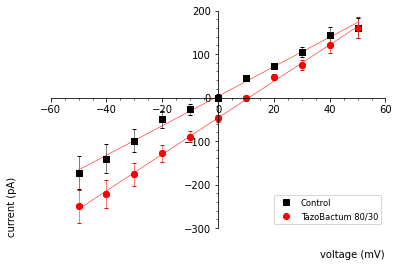

In [ ]:
# ONLY FOR BIIONIC EXPERIMENT
V = np.arange(-50, 60, 10) # mV
# no closed right boundry
I_control = I_mean_control # pA
I_ihr_salt = I_mean_salt # pA
name = "Avibactum_80_30_Bionic" # Name of the Inhibitor Salt.
T = 22 # deg C (Temperature)
# Case of biionic. DATA ENTRY FOR CONCENTRATION.
ion_name1 = "Na+"
Z1 = 1 # Valence electron number
C_cis1 = 80 # mM

C_trans1 = 30 # mM
ion_name2 = "Inhibitor-"
Z2 = -1
C_cis2 = 80 # mM
C_trans2 = 30 # mM
I = 0
# Calculating reverse potential.
V_rev_pot,slope,intercept = reverse_potential(V,I_ihr_salt,name)
print("Slope = ", slope)
print("Y-intercept = ", intercept)
print("X-intercept (Reversal Potential) = ", V_rev_pot)
# Plotting the graph. I-V curve.
Initial_IV_Graph(I_control,I_ihr_salt, V,I_SD_control,I_SD_salt,name)
p = IV_Perm_Biionic(I,V_rev_pot,T,Z1,Z2,C_cis1,C_trans1,C_cis2,C_trans2,ion_name1,ion_name2)
p1 = 1/p # More precise values
p1 = 1/p # More precise values
p1 = math.ceil(1/p)
p2 = 1
print("p1_Na+ = ", p1) #
print("p2_anion- = ", p2)
# Number of ions passing through of a particular ion.
num_of_porins = 3 # Trimeric porins.
number = num_of_ions(intercept,num_of_porins,name)
# Number of ions passing through of a particular ion.
num_of_porins = 3 # Trimeric porins.
intercept = 110
number = num_of_ions(intercept,num_of_porins,name)
I_Na = []

I_Cl = []
I_Na = breaking_ions_current(V,Z1,T,C_cis1,C_trans1,p1,ion_name1)
I_Cl = breaking_ions_current(V,Z2,T,C_cis2,C_trans2,p2,ion_name2)
I_sum = []
for i in range (N):
  I_sum = np.append(I_sum,(I_Na[i] + I_Cl[i]))
print("I_Sum",I_sum)

In [1]:
# For standard deviation calculation

I_control1 = np.array([-174,-140,-100,-55,-25,0,40,72,100,140,175]) # pA
I_ihr_salt1 = np.array([-250,-220,-175,-125,-90,-40,0,40,75,125,160]) # pA


I_control2 = np.array([-179,-148,-106,-50,-21,0,49,79,115,137,160]) # pA
I_ihr_salt2 = np.array([-241,-215,-169,-145,-99,-49,0,48,70,115,167]) # pA

I_control3 = np.array([-165,-135,-92,-45,-36,0,45,65,99,156,145]) # pA
I_ihr_salt3 = np.array([-260,-230,-185,-115,-80,-55,0,55,80,120,155]) # pA

name = "vvv_80_30" # Name of the Inhibitor Salt.

I_mean_control = []
I_SD_control = []
I_SE_control = []
I_mean_salt = []
I_SD_salt = []
I_SE_salt = []
n1 = "control" # DO NOT TOUCH THIS
n2 = "salt"
# Salt name.

I_mean_control,I_SD_control,I_SE_control = standard_data(I_control1 ,I_control2,I_control3 ,n1)
I_mean_salt,I_SD_salt, I_SE_salt = standard_data(I_ihr_salt1,I_ihr_salt2,I_ihr_salt3,n2)



NameError: ignored

TclError: ignored